# Linear regression in diabetes dataset

Let's explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

In [123]:
# importing librarires
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [124]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(scaled=False)
  




In [125]:
diabetes

{'data': array([[59.    ,  2.    , 32.1   , ...,  4.    ,  4.8598, 87.    ],
        [48.    ,  1.    , 21.6   , ...,  3.    ,  3.8918, 69.    ],
        [72.    ,  2.    , 30.5   , ...,  4.    ,  4.6728, 85.    ],
        ...,
        [60.    ,  2.    , 24.9   , ...,  3.77  ,  4.1271, 95.    ],
        [36.    ,  1.    , 30.    , ...,  4.79  ,  5.1299, 85.    ],
        [36.    ,  1.    , 19.6   , ...,  3.    ,  4.5951, 92.    ]],
       shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
        128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
        150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
        200

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [126]:
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')

In [127]:
# Ver los atributos del objeto diabetes
print(diabetes.keys())


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [128]:
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [129]:
y


0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [130]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

In [131]:

# 1. ¿Cuántos atributos tiene el dataset y qué significan?
# El dataset tiene 10 atributos (columnas), que son variables predictoras numéricas estandarizadas.
#    - age     edad (en años)
#    - sex
#    - bmi     body mass index
#    - bp      average blood pressure
#    - s1      tc, total serum cholesterol
#    - s2      ldl, low-density lipoproteins
#    - s3      hdl, high-density lipoproteins
#    - s4      tch, total cholesterol / HDL
#    - s5      ltg, possibly log of serum triglycerides level
#    - s6      glu, blood sugar level

# 2. ¿Cuál es la relación entre diabetes['data'] y diabetes['target']?
# diabetes['data'] contiene los valores de las características de entrada (X),
# mientras que diabetes['target'] contiene el valor (y), que es la progresión de la diabetes después de un año para cada paciente.
# Es un problema de regresión donde intentamos predecir 'target' usando los datos en 'data'.

# 3. ¿Cuántos registros hay en el dataset?
print(diabetes['data'].shape[0]) 
# Hay 442 registros (pacientes) en el dataset.


442


#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [132]:
print("Shape of data:", diabetes['data'].shape)
print("Shape of target:", diabetes['target'].shape)


Shape of data: (442, 10)
Shape of target: (442,)


## Building a regression model

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [133]:
from sklearn.linear_model import LinearRegression


#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [134]:
ml = LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [135]:
diabetes_data_train = x[ :-20]
diabetes_target_train = y[:-20]
diabetes_target_test = y[-20 : ]
diabetes_data_test = x[-20 : ]

In [136]:
diabetes_target_test.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20 entries, 422 to 441
Series name: target
Non-Null Count  Dtype  
--------------  -----  
20 non-null     float64
dtypes: float64(1)
memory usage: 292.0 bytes


In [137]:
diabetes_data_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
417,34.0,1.0,33.0,73.00,178.0,114.6,51.0,3.49,4.1271,92.0
418,51.0,1.0,24.1,87.00,261.0,175.6,69.0,4.00,4.4067,93.0
419,43.0,1.0,21.3,79.00,141.0,78.8,53.0,3.00,3.8286,90.0
420,55.0,1.0,23.0,94.67,190.0,137.6,38.0,5.00,4.2767,106.0


Perform a brief exploratory analysis to investigate the conditions necessary for linear regression. This analysis will help you understand the distribution of the target variable and its correlations with other features.

In [138]:
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [139]:
diabetes_data_train.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,48.625592,1.466825,26.419668,94.739289,188.753555,115.094076,49.650474,4.072891,4.643205,91.146919
std,13.174225,0.499490,4.420517,13.841209,34.530112,30.342554,12.740111,1.293263,0.526545,11.455884
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,39.000000,1.000000,23.225000,84.250000,164.000000,96.000000,40.000000,3.000000,4.276700,83.250000
50%,50.000000,1.000000,25.750000,93.000000,186.000000,112.300000,48.000000,4.000000,4.625000,91.000000
75%,59.000000,2.000000,29.375000,105.000000,208.750000,133.450000,57.000000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [140]:
ml.fit(diabetes_data_train, diabetes_target_train)

LinearRegression()

In [141]:
print(ml.intercept_)

-333.076427614925


In [142]:
print(ml.coef_)

[ 1.11189912e-03 -2.26518397e+01  5.50264072e+00  1.12832513e+00
 -1.12017963e+00  7.71597175e-01  3.78624197e-01  6.81207592e+00
  6.77753611e+01  3.15200445e-01]


#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

In [143]:
predictions = ml.predict(diabetes_data_test)
predictions

array([197.61898486, 155.44031962, 172.88875144, 111.53270645,
       164.79397301, 131.06765869, 259.12441219, 100.47873746,
       117.06005372, 124.30261597, 218.36868146,  61.19581944,
       132.24837933, 120.33293546,  52.54513009, 194.03746764,
       102.5756431 , 123.56778709, 211.03465323,  52.60221696])

In [144]:
predictions2 = ml.predict(diabetes_data_train)
predictions2

array([206.75891684,  68.43928832, 178.202843  , 166.58687681,
       129.47568331, 105.48474005,  74.89749756, 120.73116457,
       159.81889474, 211.92889324,  97.83287755,  97.40982506,
       115.6082563 , 164.92321504, 103.34354044, 177.68446716,
       210.74959409, 184.39724335, 148.54433438, 123.5598679 ,
       120.97659491,  86.40941954, 113.06614789, 252.36133291,
       165.02520753, 147.87720453,  97.36705872, 179.12372841,
       129.58348133, 185.3877115 , 158.11938271,  69.55013471,
       263.37028604, 113.46478465,  79.56686951,  87.7219928 ,
       207.0386214 , 157.45867774, 240.6599475 , 137.14804961,
       155.31515392,  74.42603417, 146.31283302,  78.52883954,
       222.11894941, 126.59547192, 141.84309866, 109.45038405,
        75.09520047, 190.42078462, 159.23651503, 171.06320351,
       134.14506521, 159.31399389, 138.94610068,  73.39466233,
       207.21316516,  80.45820611, 103.8913562 , 135.51924488,
       113.75820247, 181.56924301,  61.77550864,  98.88

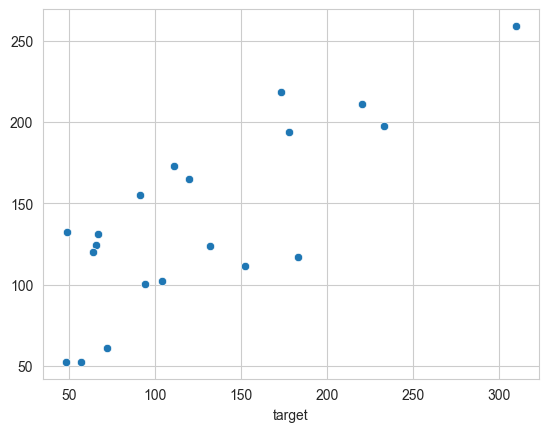

In [145]:
sns.scatterplot(x = diabetes_target_test, y = predictions);  # la X es precios reales y la Y las predicciones 

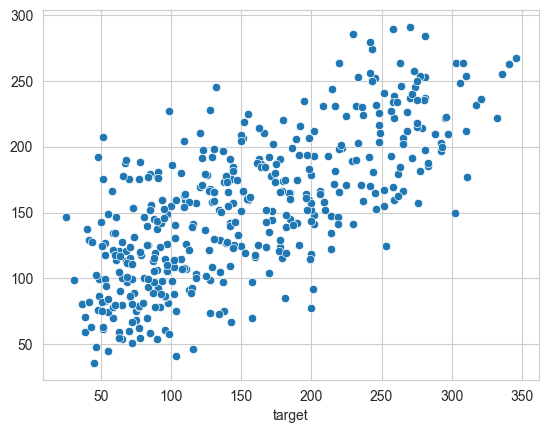

In [146]:
sns.scatterplot(x = diabetes_target_train, y = predictions2);

y = a + b*x1 + c*x2 + d*x3 + ....

#### Print your `diabetes_target_test` and compare with the prediction. 

In [147]:
predictions

array([197.61898486, 155.44031962, 172.88875144, 111.53270645,
       164.79397301, 131.06765869, 259.12441219, 100.47873746,
       117.06005372, 124.30261597, 218.36868146,  61.19581944,
       132.24837933, 120.33293546,  52.54513009, 194.03746764,
       102.5756431 , 123.56778709, 211.03465323,  52.60221696])

In [148]:
var = pd.DataFrame(diabetes_target_test)

In [149]:
var["predictions"] = predictions

In [150]:
var

,target,predictions
422,233.0,197.618985
423,91.0,155.440320
424,111.0,172.888751
425,152.0,111.532706
426,120.0,164.793973
427,67.0,131.067659
428,310.0,259.124412
429,94.0,100.478737
430,183.0,117.060054
431,66.0,124.302616


#### Is `diabetes_target_test` exactly the same as the model prediction? Use different error metrics

In [151]:
from sklearn import metrics

In [152]:
ml.score(diabetes_data_test, diabetes_target_test) 

0.5850854274471959

In [153]:
print('MAE:', metrics.mean_absolute_error(diabetes_target_test, predictions)) #LA SUMA DE TODAS LAS DIFERENCIAS ENTRE EL VALOR PREDICHO Y EL REAL
print('MSE:', metrics.mean_squared_error(diabetes_target_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(diabetes_target_test, predictions)))  

MAE: 36.609618655458746
MSE: 2004.5186863342053
RMSE: 44.77185149548995


In [154]:
diabetes_target_test.describe()

count     20.000000
mean     126.200000
std       71.312212
min       48.000000
25%       66.750000
50%      107.500000
75%      174.250000
max      310.000000
Name: target, dtype: float64

#### Iterate with a new model to assess if any improvements can be made compared to the previous one. Consider reducing the number of variables or using `StandardScaler` to enhance model performance.